多层感知机的优点在于它几乎可以进行任何复杂的处理，但是缺点在于认为确定感知机的合适的、复合预期的参数的过程是非常复杂的，神经网络的出现就是为了解决这个问题，因为神经网络有一个重要的性质就是它可以自动从数据中学习到合适的权重参数。

# 3.1 从感知机到神经网络
## 3.1.1 神经网络的例子
用图来表示神经网络的话，我们把最左边的一列称为输入层，最右边的一列称为输出层，中间的统一称为中间层（隐藏层）。
## 3.1.3 激活函数登场
激活函数将输入信号的总和转换为输出信号，激活函数的作用在于决定如何激活输入信号的总和。激活函数是感知机和神经网络的桥梁。

一般而言，“朴素感知机”/“人工神经元”是指单层网络，指的是激活函数使用了阶跃函数的模型。“多层感知机”是指神经网络，即使用sigmoid函数等平滑的激活函数的多层网络。

# 3.2 激活函数
## 3.2.1 阶跃函数的实现及图像绘制
阶跃函数：阶跃函数这种激活函数以阈值为界，一旦输入超过阈值，就切换输出。下述代码通过python的代码技巧实现了一个可以支持数组的阶跃函数：
## 3.2.2 sigmoid函数的实现及图像绘制
sigmoid函数是神经网络中经常使用的一个函数：
$$h(x) = \frac{1}{1+e^{-x}}$$
## 3.2.3 非线性函数
## 3.2.4 ReLU函数
在神经网络的发展历史上，sigmoid函数很早就开始使用了，而最近则主要在使用ReLU函数。ReLU函数在输入值大于0时，直接输出改值，在输入小于等于0时，则输入0。
$$h(x) = \begin{cases} x & (x > 0) \\ 0 & (x <= 0)\end{cases}$$



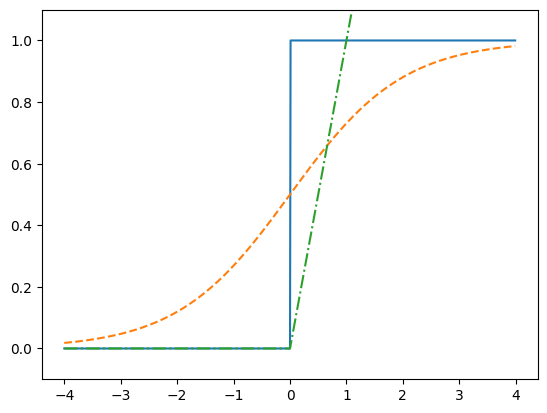

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    y = (x > 0)
    return y.astype(np.int_) # numpy数组类型转换函数，参数为期望转换的类型

def sigmoid(x):
    return 1/(1+np.exp(-x))

def ReLU(x):
    return np.maximum(0,x)

x = np.arange(-4.0, 4.0, 0.01)
y = step_function(x)
y2 = sigmoid(x)
y3 = ReLU(x)
plt.plot(x, y)
plt.plot(x, y2, linestyle="--")
plt.plot(x, y3, linestyle = "-.")
plt.ylim(-0.1, 1.1)
plt.show()


# 3.4 三层神经网络的实现
神经网络中，使用矩阵运算可以加快模型的运算效率，每两层之间的参数传递过程可以用下面的矩阵乘法表达式来标识：
$$Y=XW+B$$
其中，X为上一层的神经元信号，W为权重矩阵，B为偏置矩阵

注意：其实除了输入层外的每一层神经元都需要激活函数,这里在引入一个激活函数：恒等函数，恒等函数会将输入原样输出

In [16]:
import numpy as np

def identity_function(x):
    return x

def sigmoid(x):
    return 1/(1+np.exp(-x))

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['B1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['B2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['B3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    
    a1 = sigmoid(np.dot(x, network['W1'])+network['B1'])
    a2 = sigmoid(np.dot(a1, network['W2'])+network['B2'])
    a3 = identity_function(np.dot(a2, network['W3'])+network['B3'])

    return a3

x = np.array([1.0, 0.5])
network = init_network()
print(forward(network=network, x=x))

[0.31682708 0.69627909]


# 3.5 输出层的设计
神经网络可以用来解决回归问题和分类问题，不过需要根据情况选择输出层的函数，一般来说，回归问题采用恒等函数，分类问题采用softmax函数。（输出层的激活函数用$\sigma(x)$）表示。
## 3.5.1 恒等函数和softmax函数
恒等函数会将输入原样输出，而softmax函数是下列函数:
$$y_k = \frac{exp(a_k)}{\sum_{i=1}^n{exp(a_i)}}$$
## 3.5.2 在代码中实现softmax函数
在代码的实现过程中，我们需要注意指数函数的“溢出”问题，当参数的值过大时，计算机可能无法计算指数的结果，因此我们需要使用数学原理来减轻计算的负担：
$$y_k = \frac{e^{a_k}}{\sum_{i=1}^n{e^(a_i)}} =\frac{C e^{a_k}}{C \sum_{i=1}^n{e^(a_i)}} = \frac{e^{a_k+logC}}{\sum_{i=1}^n{e^(a_i+logC)}} =\frac{e^{a_k+C}}{\sum_{i=1}^n{e^(a_i+C)}}$$
公式中的常数C我们一般会选择数组中的最大值。
类似的，我们可以选择同样的方式处理sigmoid函数的溢出，
$$ \frac{1}{1+e^{-x}} = \frac{C}{C+e^{-x+logC}}$$
## 3.5.3 softmax函数的性质
softmax函数的输出总是0到1之间的实数，并且这些实数的和为1，因此我们可以把softmax函数的输出认为是“概率”，一般神经网路也会把输出值最大的神经元所对应的类别作为识别类别。

同时softmax函数的输出不改变原来的各个元素之间的大小关系，因此在实际过程中，输出层的softmax函数可以省略。

**注意：机器学习的过程可以分类两个过程：“学习”和“推理”，在学习的过程中，模型会根据输入的数据集进行参数的学习，然后推理时，使用模型对未知的数据进行推理（分类）。**

In [17]:
import numpy as np

def softmax(a):
    C = np.max(a)
    sum = np.sum(np.exp(a-C)) # fix overflow
    return np.exp(a-C)/sum

a = np.arange(1,10,1)
print(softmax(a))

[2.12078996e-04 5.76490482e-04 1.56706360e-03 4.25972051e-03
 1.15791209e-02 3.14753138e-02 8.55587737e-02 2.32572860e-01
 6.32198578e-01]


# 3.6 MNIST手写数字数据集的识别
## 3.6.1 MNIST数据集预处理
load_mnist()函数中有一个参数是normalize，来确定是否要*正规化（normalization）*，**正规化是把数据限定到某个范围内的处理**，对数据进行某种既定的转换称为数据额预处理(pre-processing)
## 3.6.2 神经网络的推理
## 3.6.3 批处理
以批为单位，进行推理处理，能够实现更高速的运算。因为大多数处理数值计算的库都进行了能够高效处理大型数组运算的最优化，也就是说批处理一次性计算大型数组要比分开逐步计算各个小型数组速度更快。

没有使用批处理前，运行时间为5.4s，使用批处理后运行时间为3.6s


In [18]:
from dataset.mnist import load_mnist
import sys, os
import numpy as np
from PIL import Image
import pickle

sys.path.append(os.pardir)

def sigmoid(x):
    y = []
    k = -1
    for i in x:
        y.append([])
        k+=1
        for j in i:
            if j < 0:
                y[k].append(np.exp(j)/(1+np.exp(j)))
            else:
                y[k].append(1/(1+np.exp(-j)))

    return np.array(y)
    
def softmax(a):
    C = np.max(a)
    sum = np.sum(np.exp(a-C)) # fix overflow
    return np.exp(a-C)/sum

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

def get_data():
    (x_train, t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)
    return x_test, t_test

def init_network():
    with open("./ch03/sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    a1 = sigmoid(np.dot(x, network['W1'])+network['b1'])
    a2 = sigmoid(np.dot(a1, network['W2'])+network['b2'])
    a3 = softmax(np.dot(a2, network['W3'])+network['b3'])

    return a3

accuracy = 0
batch_size = 100

network = init_network()
(x_test, t_test) = get_data()
for i in range(0, len(x_test), batch_size):
    result = np.argmax(predict(network, x_test[i:i+batch_size]), axis=1)
    accuracy += np.sum(result == t_test[i:i+batch_size])

print("Accuracy:"+str(float(accuracy/len(x_test))))



Accuracy:0.9207
